# Housing Markets Across the United States
By Peter Sapiro-Mitten and Sam Wisnoski

# Introduction #
Home ownership is one of the most reliable ways to build wealth and consequently, buying a home is a massive investment no matter where you live. However not all homes, or the locations of homes, are created equal. Our modeling questions are: how does the housing market vary across the United States with regards to the largest city in each state? In order to remove bias from our results, we are investigating data across a very specific type of home: a single-family home with exactly two bedrooms. In our investigation, we aim to gather the price, squarefootage, and year built of these types of homes from each states largest city - again, in order to remove bias, we chose the most populated city within each state. By examining these metrics, we will be able to determine how the cost of living (in regards to the housing market) varies throughout the United States, providing us with insight into the concentrations of wealth in the country. In addition to our main modeling questions, we have a variety of secondary modeling questions to guide us in gathering and processign data. For instance, are older houses more expensive? Does more square footage always correlate to more a expensive house? Are newer houses typically larger than older ones?  


We will visualize our findings across six different data visualizations: we will have three full maps of the United States to characterize price, square footage, and age of the houses in each state's largest city.  Each map is color coded based on the extremity of the data. We will also have three scatterplots visualizing a relationship between our three metrics: price vs. square footage, year built vs. price, and year built vs. square footage. Together these will make a comprehensive framework to examine how the housing market varies across the United States.


In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



# Methodology #

## Everything API ##
### How to access the API ###
The data we used and analyzed came from RentCast which is a real estate analysis tool that can be found at https://www.rentcast.io/api. RentCast, among other things, provides access to an API that we can use to access public sales listings. With this API you can make up to fifty inquiries a month free of charge, with each inquiry providing up to five-hundred data points.
To access the API, click on the header labeled "API". From there, click "Start for Free". This will take you to the API dashboard which will prompt you to log in. Follow the directions to make an account, unlocking your API dashboard. However, in order to use an API key, you need to sign up for a plan. At the bottom of the page click "select plan", and select the developer plan. This plan is REQUIRED, but it is also FREE OF CHARGE. In order to sign up, you will have to provide credit card information. We promise that you will not be charged, even if you forget to cancel the subscription, since the plan is entirely free. Once you have activated your plan, scroll up to the API keys module. On the right of the module there is a plus sign with Create API Key next to it. This will create your API key and prompt you to label it. Now you have successfully created an active API key and can begin to make inquiries. Running the get_fifty_states_data() function will use all of your free inquiries, SO ONLY RUN THE FUNCTION ONCE. If you run the file more than once, you WILL be charged 0.20$ per additional inquiry. If you need to make more than 50 inquiries, you can sign up for a second, third, or fourth account. Importantly, you can use a fake or even non-existent email to sign up for RentCast.

### API Constraints ###
If we wanted to get data from every state, the limit of 50 inquiries meant that we would have no room for error. However, we wanted to be able to run experience and tests as to how to format our inquiries, what data they would yield and what metrics to look for. In order to work around this constraint, we each made an account, allowing us to use one for experimentation and the other to actually collect the data. When experimenting with the API, we learned that there are three different "endpoints" which we could use in our inquiries. The endpoint `/properties` provides information about a specific address; however, we were interested in the average characteristics of homes in each area, not a single address. Using `/listings/rental/long-term` provided data about rental prices in each area, this is helpful in the sense that it can give many addresses, but we were more interested in the market for buying a home, not renting. The endpoint that we found most helpful, and the one we ended up using was `/listings/sale`. This not only gave us the price of many homes for sale, which was our main area of interest, but it also provided the other characteristics we needed such as age of the home, square footage, style of home (apartment, condo, single family etc.), and number of bedrooms and bathrooms. All our data was collected from the /listings/sale endpoint.

**Note: there is a bias in the data called. The returned houses are the (up to 500) most recent houses viewed on RentCast. We discuss these limitations further in the conclusion of our essay. 

### Acquiring Cities ###
Using Wikipedia, we found the most populous city in each state and created a csv file that included the state, name of the city, and latitude/longitude coordinates. We specifically chose coordinates as the API is able to search based on coordinates and a radius. We loaded this .csv file into our repository, allowing us to load it in python as a dataframe using pandas. When making inquiries, we can provide specific parameters so the API knows what results to search through and return -- as mentioned earlier, we are already using the constraints of a single family home with 2 bedrooms. With the data frame of coordinates loaded, we were also able to specify location. We iterated through each state, changing the API request slightly each time (using an f-string) based on the relevant coordinates. Additionally, we chose a radius of four miles from the specified coordinates, for a total area of ~50 square miles. To provide examples, our first two requests were: `https://api.rentcast.io/v1/listings/sale?bedrooms=2&propertyType=Single Family&latitude=34.73037&longitude=-86.5861&radius=4&limit=500` for Alabama and `https://api.rentcast.io/v1/listings/sale?bedrooms=2&propertyType=Single Family&latitude=61.21806&longitude=-149.90028&radius=4&limit=500` for Alaska.

The data from the inquiries is then stored in an individual text files in the in a folder within our repository labeled city-data. Each file is named using the state abbreviation followed by the name of the most populous city, for example al_huntsville.txt or ak_anchorage.txt.

Running the below file will recollect the data. Follow the instructions in the README file to ensure you create and use your API Key correctly. If you created your API correctly, you should see each state abbreviation followed by the status code 200. 




In [3]:
import getting_data
api_key = "your-api-key-here"
getting_data.get_fifty_states_data(api_key)

AL
200
AK
200


KeyboardInterrupt: 

## Data Processing ##

### Initial Processing ###
When calling an inquiry, the results are returned as a list of dictionaries. Each dictionary corresponds to an address in the area and has a base set of data: for the endpoint listing/sales, this information included things such as price and address. Each house can also contain different information, such as the number of bedrooms, the square footage of the house, or the year it was built. In the dictionary, the defining metric would be the key, and the value would be the value. For example, dictionary[“bedrooms”] = 2. As a reminder, when searching through the different metropolitan areas, we wanted to keep our results similar in house design, so when calling our inquiries, we specifically requested single family houses with two bedrooms. As mentioned earlier, we made inquiries for the largest city in each state and stored the results in a separate text file (simply by writing the exact output of the API to a text file). 

We approached data processing in two very different ways for our two different methods of visualization (creating a map and creating a scatterplot). However, for both methods, we left the data in its current form (a list of dictionaries) for initial processing. This initial processing, which occurs in the “processing_data.py” file, slims the data into the sole aspects we care about. There are six functions within the processing_data.py file. All files take a single file containing data — three return price, age and square footage for the scatterplot, and three return price, age, and square footage for the map. This occurs in the following steps:
- Opening the file and reading its contents into a single variable, “string_data”. This string is then processed by JSON and turned to an actual list of dictionaries and stored in “processed_data”. 
- Each item in the processed_data, a dictionary representing a single house, is iterated through and key information is stored. Depending on the specific function, this key information could be the price of the house, the square footage of the house, or the year the house was built.
- For the map, this data is then averaged together and returned as a single float, representing that quantity for the state. 
- For the scatterplot, since we need to have the x and y axes correlated and aligned, data is only extracted from houses that have a listed price, square footage, and year built. This data is returned as a list with all of the data for each address. 

### Scatterplot ###
Now that we have established our functions for initial data processing, let's dive deeper into our visualizations, beginning with the scatterplot. For the scatterplot, we first load the data files containing the largest city in each state. We then define a dictionary `data_dictionary` that has empty lists for price, age, and sqft. We then iterate through the largest city in each state and call the functions `all_age()`, `all_price()`, and `all_sqft()` on each cities data, adding the results to the growing list of all the prices, ages, and square footages of our data, all of which are contained in the dictionary. Since the data is processed using the exact same method in all three functions, the indices of the list correspond to one another, ie. the 42nd index of the list `age` corresponds to the 42nd index of the list `price` and the 42nd index of the list `sqft`.  
    
Once we have a full dictionary of data, we can easily plot this data as a scatter plot using `matplotlib.pyplot`. We simply feed the function the two metrics we want to compare and the two appropriate axes, axis labels, and title, and the function will plot a scatter plot with those constraints. An example call would be: `create_scatter_plot("YearBuilt", "Sqft", (1700, 2050), (-1000, 7000), "Year Constructed", "Square Footage", "Year Constructed vs. Square Footage for Single Family Homes across the USA")`. 

### Heatmap ###
Our second type of visualization is a heatmap of the United States. In order to properly create this graph, we first needed accurate data of the United States. We used the 2018 census data, which required downloading the data and uploading it to our repository, and we used geopandas to read the data. We also wrote and utilized the functions `translate_geometries` and `adjust_maps` to move Alaska and Hawaii into the standard positions, below the map. Once we had our map data, we began a similar process that we used for the scatterplot. We loaded the file containing the largest city in each state and we defined a dictionary `data_dictionary` that has empty lists for price, age, and sqft. However, rather than getting all of the data for each city, we used the functions `average_price`, `average_sqft`, and `average_age` to get the averages for each state. Additionally, in contrast to creating scatterplots, we needed to process this data into a dataframe, as our existing geographical data was in a dataframe, and geopandas works exclusively with dataframes. We finish processing our data by combining our dataframe (which has price, age, sqft) with the geography dataframe. We match the dataframes using the abbreviations for each state, so that each price/age/sqft pair is properly mapped to the correct state. 

Now that the geographical and housing data is combined, we are ready to plot the data. We begin by defining a set of 21 colors that range from white to light green to dark green to very dark green, as well as a background color and an edge color. To create the heatmap, we used the create_map function, which takes in the parameters `threshold values` for color breaks, `metric`, which is the metric to be displayed, `title`, a title for the map, `legend_title`, a title for the legend, `unit`, the unit of measurement for the legend, and `threshold_high`, a label for threshold values higher than the highest value.

Inside the create_map function, we first assign colors to the states based on their housing prices. This is done by iterating over each state's housing metric value and comparing it against the specified data breaks to determine the color from the shades of green defined outside the function. We then plot the map with the specified housing metric, utilizing the merged_states GeoDataFrame which includes setting edge colors, legend, and colormap.

Next, we needed to plot markers for the largest cities in each state and annotate them on the map. Earlier in the function, we loaded in the csv file with all of the coordinates of each city, as well as the name and state that city is attached to. We translate these coordnates from a latitude/longitude system to the ESRI:102003 coordinate reference system, which is what our map is plotted in. We then itterate through each city, plot it on the map using shapely.geometry.point, and annotate it accordingly with the city name. For the cases of Alaska and Hawaii, we manually relocated them to match the repositioning of the states. Lastly, we add a legend using matplotlib.patches.Patch and our threshold/color data. A few additional plot settings are configured, (adjusting axis and removing padding), and the map is finally displayed using plt.show().

Both functions for the data visualization are previewed below. 

# Results #

First, we must import the two functions used for data visualizaton. Run the cell below to do so.

In [6]:
from correlation_visualization import create_scatter_plot
from map_visualization import create_map

### Map of Average House Price by State ##
From this graph we can see that the most expensive cities tend to be centered around the East and West coast with the notable exception of Denver. The Midwest tends to have the cheapest single family homes. Mississippi has the least expensive homes, while New York, Seattle, and Honolulu have the most expensive homes. This is possibily due to the higher populations in the costal areas and lower populations in the midwest.

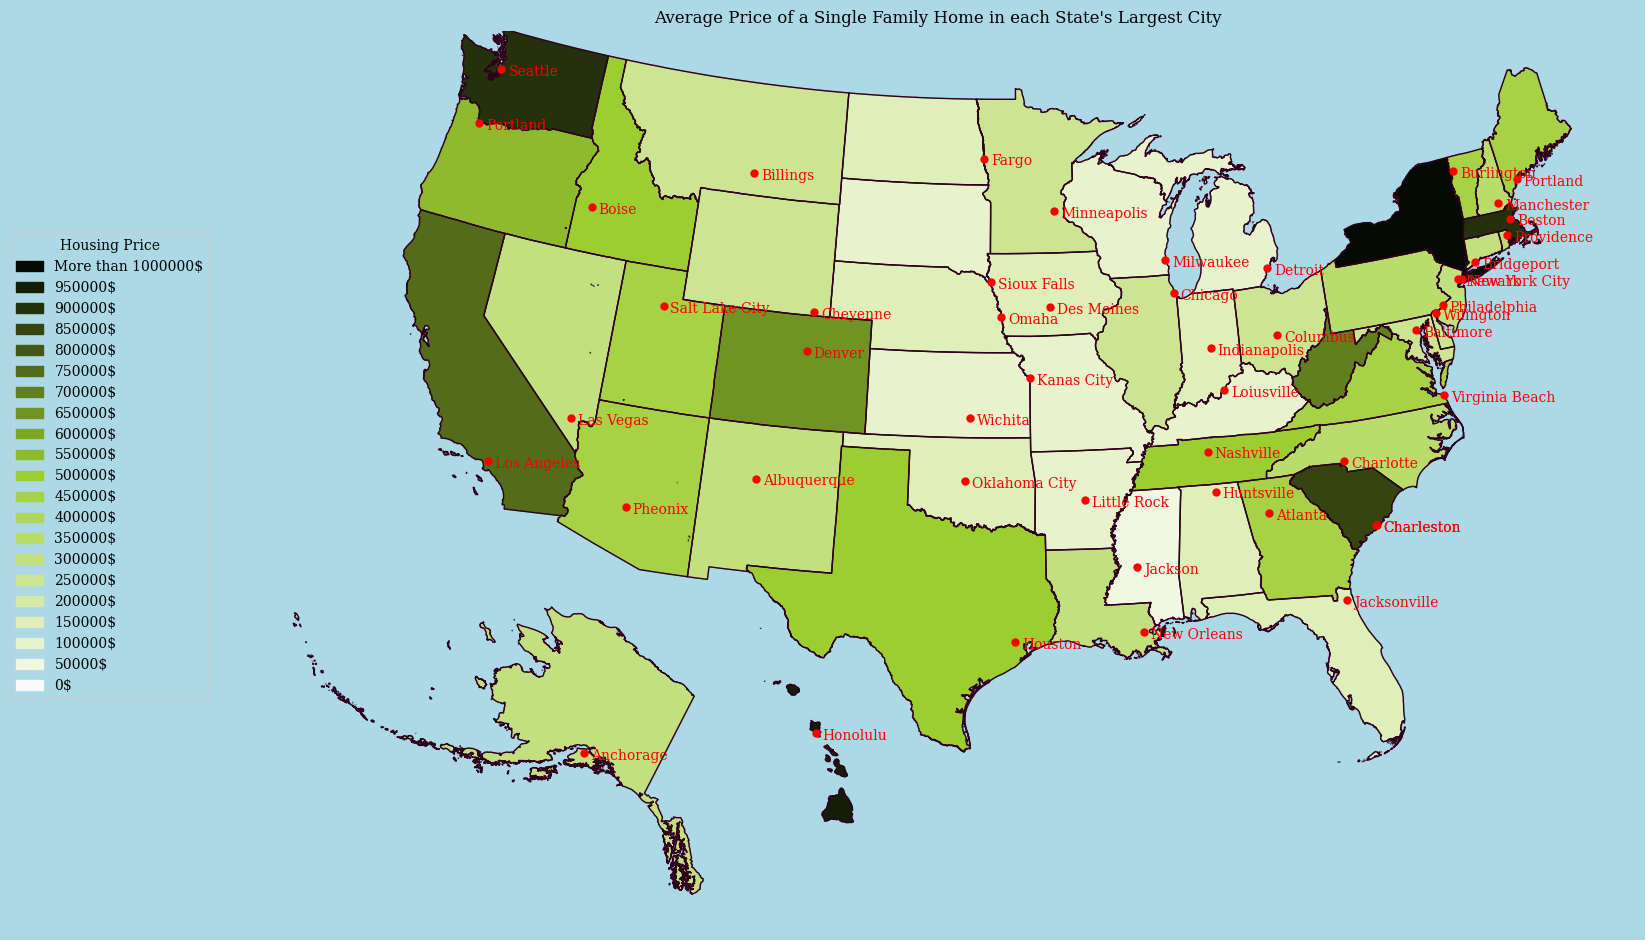

In [13]:
threshold1 = [i * 50000 for i in range(19, -1, -1)]
metric1 = "Price"
title1 = "Average Price of a Single Family Home in each State's Largest City"
legend_title1 = "Housing Price"
unit1 = "$"
threshold_high1 = 1000000
create_map(threshold1, metric1, title1, legend_title1, unit1, threshold_high1)

### Map of Average  Square Footage by State
This map shows a pretty similar level of square footage across the United States, with some notable exceptions. Oregon, North Dakata and New York have the largest homes. Oregon was mid to upper range in the price range, whereas North Dakota has very inexpensive homes despite them being large. New York was in the extremes for the price of homes and the size of the homes. The price disparity between these three leaders in square footage indicated that there is little correlation between the price of a single family home and its size. We will look further into this question in a later graph. There is also little correlation between the size of a single family home and it's location. 

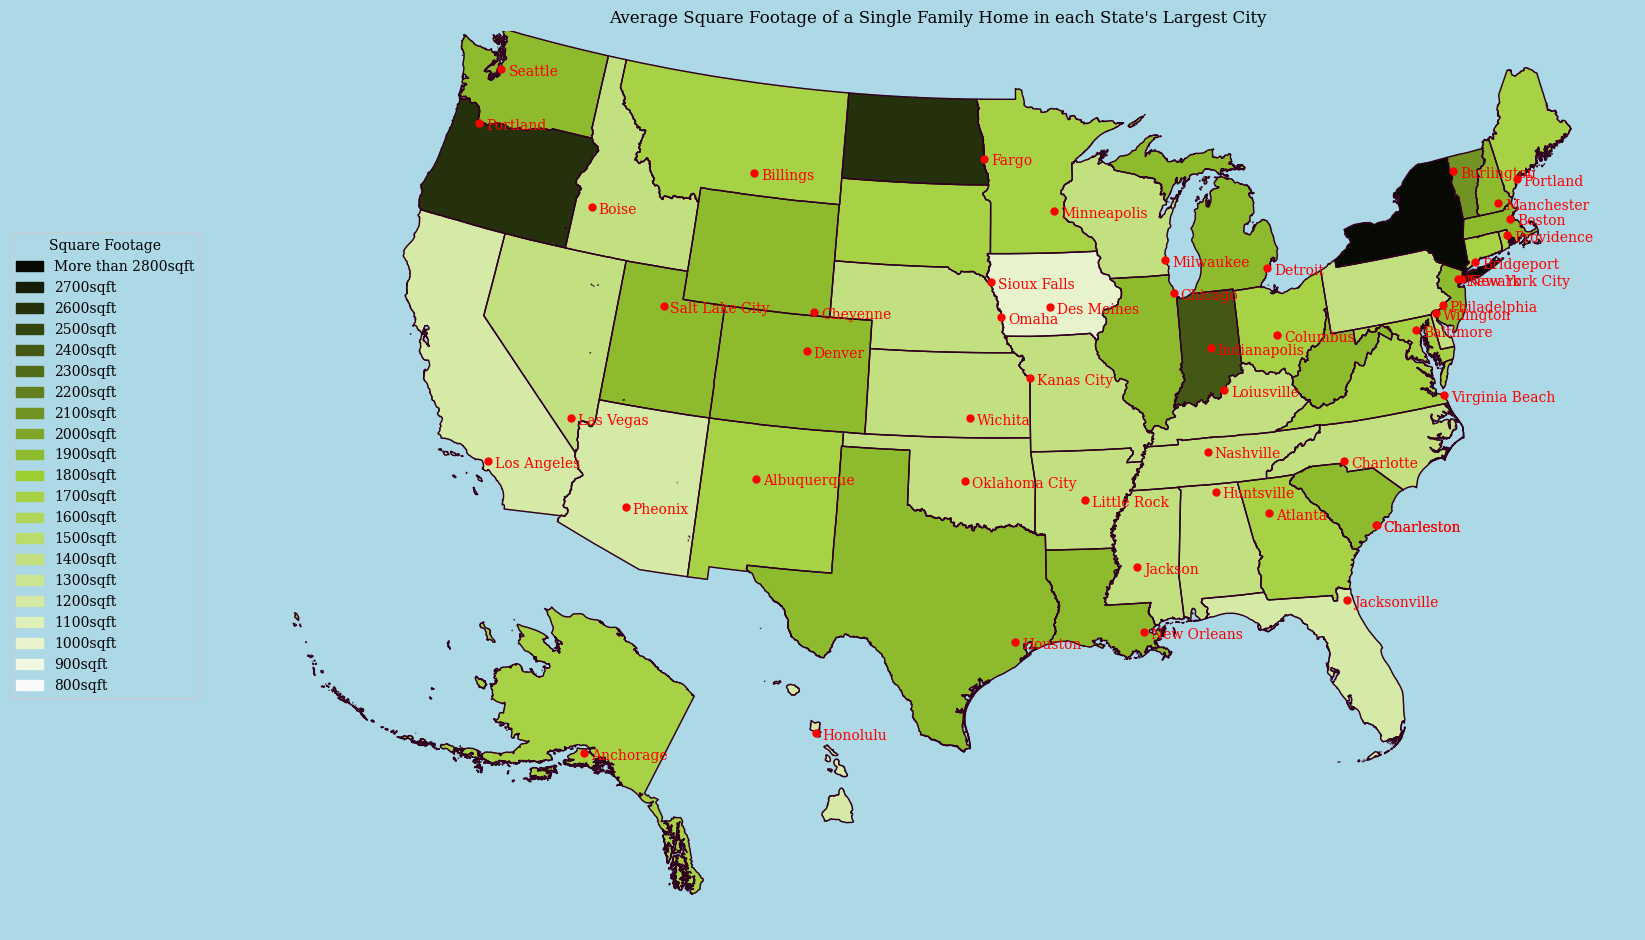

In [14]:
threshold2 = [i * 100 + 800 for i in range(19, -1, -1)]
metric2 = "Sqft"
title2 = "Average Square Footage of a Single Family Home in each State's Largest City"
legend_title2 = "Square Footage"
unit2 = "sqft"
threshold_high2 = 2800 
create_map(threshold2, metric2, title2, legend_title2, unit2, threshold_high2)

### Map of Average Year Built by State
This map shows the age of development for each state. This graph in particular must be taken with a grain of salt, since it depends much more on the city than the state as a whole. The single family houses on the East Coast are much older, with Boston, Baltamore, and Philadelphia being older cities. This is explained by the fact that European settlers first built cities on the East Coast and so these cities still had houses for that era. The notable exception is Virginia Beach which has experienced a remarkable amount of new development in the last decade. As you look to the West you can see the age of homes growing closer to being built in 2000. Seattle, Las Vegas, and Virginia Beach have the newest single family homes, while Boston and Chicago have the oldest single family homes.

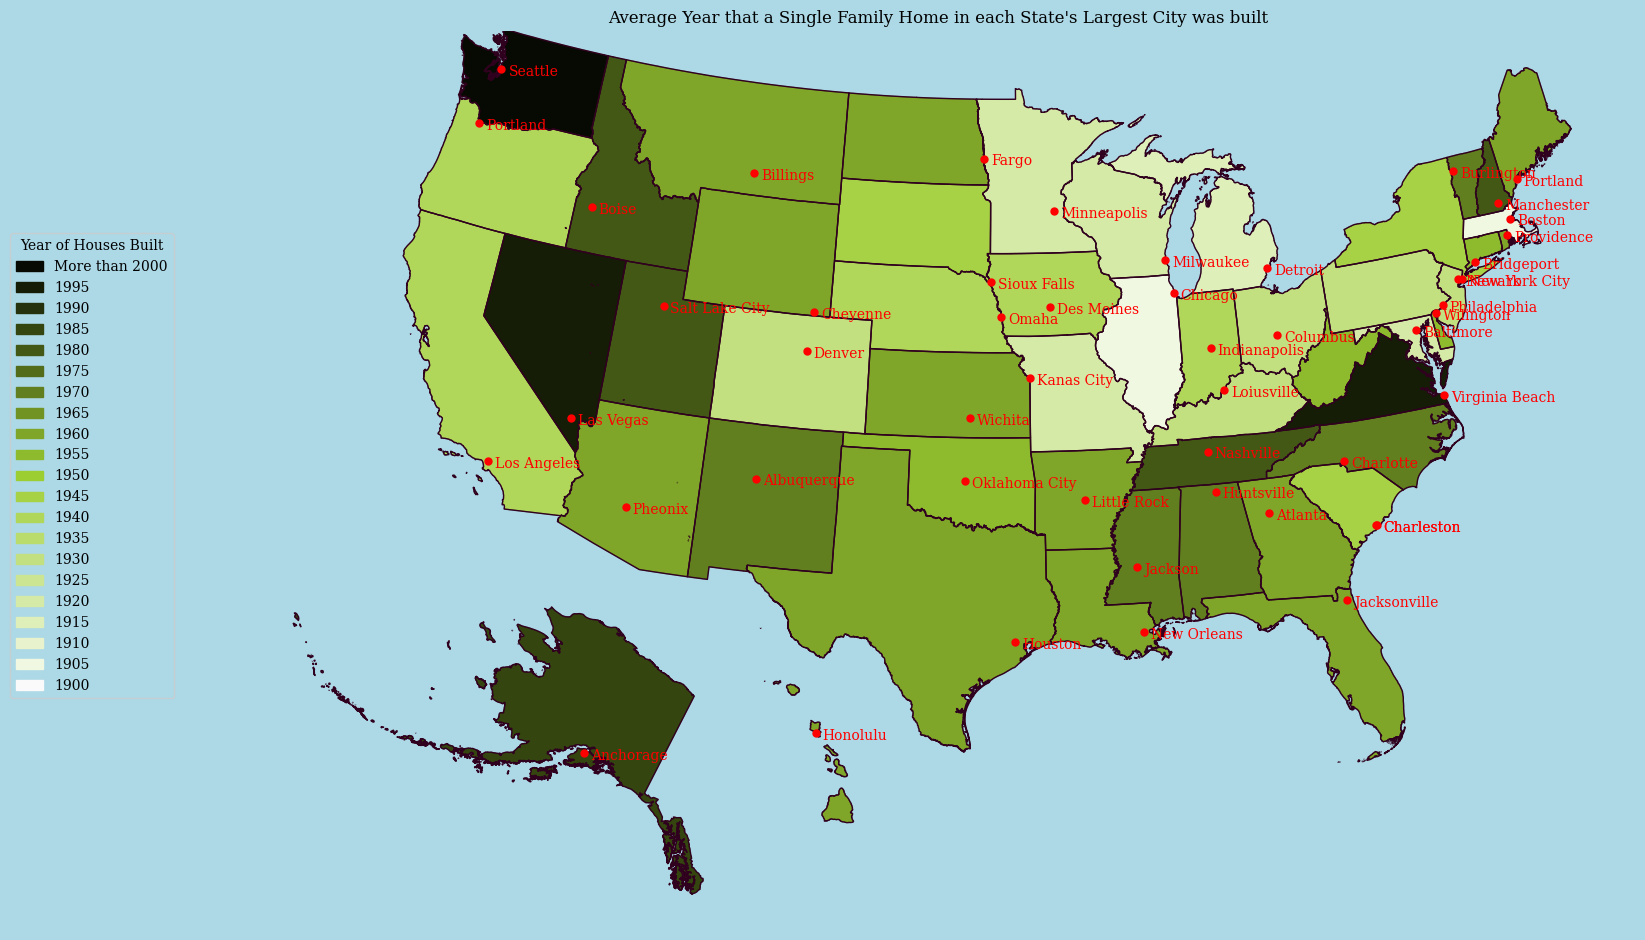

In [14]:
threshold3 = [i * 5 + 1900 for i in range(19, -1, -1)]
metric3 = "YearBuilt"
title3 = "Average Year that a Single Family Home in each State's Largest City was built"
legend_title3 = "Year of Houses Built"
unit3 = ""
threshold_high3 = 2000 
create_map(threshold3, metric3, title3, legend_title3, unit3, threshold_high3)

### Year Built Vs. Price
This plot indicates a V like shape relating to the age of a home vs the price. Houses built around 1925 tend to be more valuable than those built before 1925 and after 1925. Additionally, houses built after 1970 see a sharp increase in the base price and increase in the overall price. This can be attributed to the fact that old homes are valuable because of their historical significance, while more modern homes are valuable because they have trendier styling as well as more creature comforts. The homes that are built between 1870 and 1900 might have historical appeal, but are signifigantly lacking the modern comforts and are therefore less expensive. This graph could also be an explanation for the concentration of the prices of homes on the coasts of the United States. The East coast tends to have older homes which are more expensive. The West coast tends to have the newest homes and so they are in turn more valuable. The midwest has many homes build in the built in the 1960's and 1970's and are therefore less expensive.

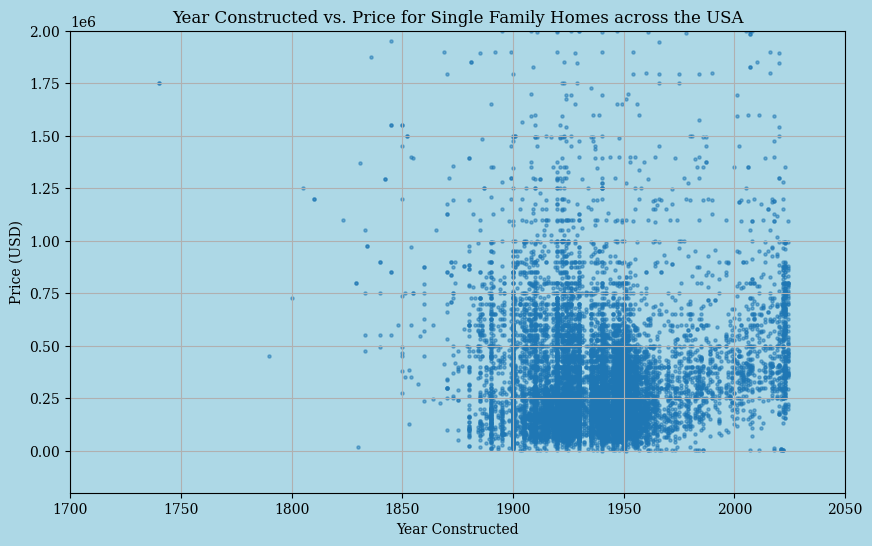

In [19]:
create_scatter_plot("YearBuilt", "Price", (1700, 2050), (-200000, 2000000), "Year Constructed", "Price (USD)", "Year Constructed vs. Price for Single Family Homes across the USA")

### Square Footage Vs. Price
Suprisingly, The price of a home and the square footage seem to have little correlation to one another. There is a slight increase in base price as the square footage increases but not nearly as much as we expected. The corelation is positive, but it is not strong. As the two maps above regarding price and square footage also indicate, the location of the home seems to be a more impactful factor on the cost as opposed to the size of the home. 

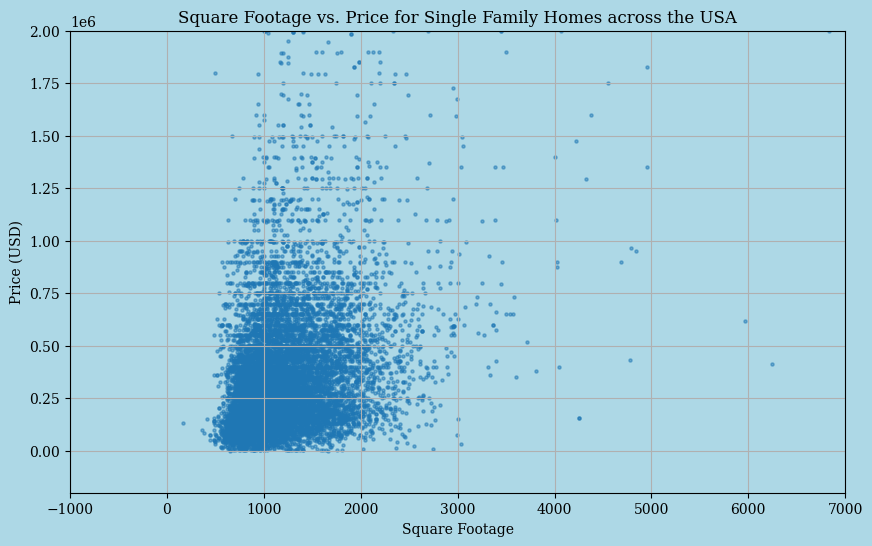

In [18]:
create_scatter_plot("Sqft", "Price", (-1000, 7000), (-200000, 2000000), "Square Footage", "Price (USD)", "Square Footage vs. Price for Single Family Homes across the USA")

### Year Built Vs. Sqaure Footage
There are several spikes in the size of homes: the first being in the roaring 1920s and then another around 1950. There is a bottle neck around the turn of the century with a quick recovery. The spikes are likely due to infusion of wealth into the United States economy. Additionally, unrelated to the square footage of homes, we can see that there were less homes built in the 1970's to the early 2000's compared to 1900 to 1960. 

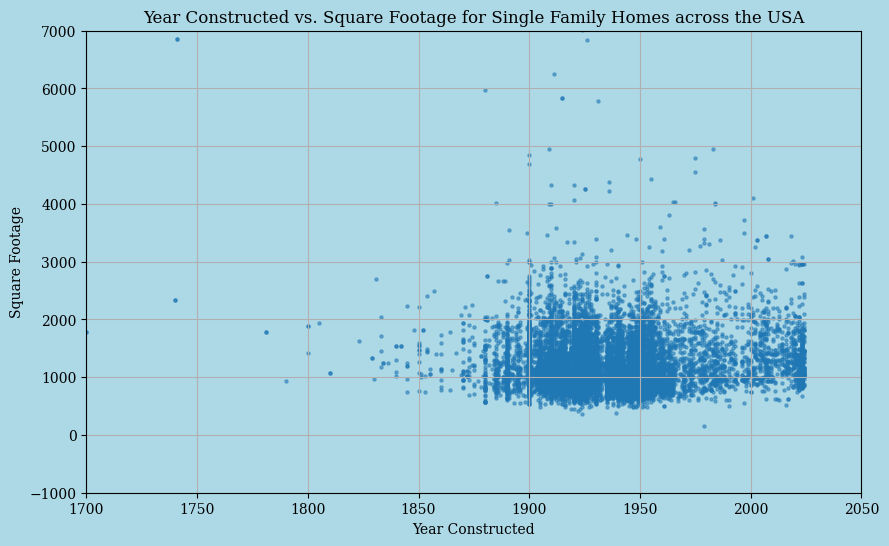

In [17]:
create_scatter_plot("YearBuilt", "Sqft", (1700, 2050), (-1000, 7000), "Year Constructed", "Square Footage", "Year Constructed vs. Square Footage for Single Family Homes across the USA")

### Interpretation
These results and visualizations provide several insights into the state-by-state variations in the housing market. We can clearly see that the price for a home in the United States varies greatly by location, with the concentrations of the wealth being on the coasts. This is to be expected as historically the coasts and ports have been centers of trade and commerce. We also can observe a gradient of the age of the homes moving from oldest on the East coast to newest on the West coast. This is mostly likely a result of the way in which the United States was settled and Westward expansion. In addition, in recent decades the West has seen rapid development, especially around the tech sectors. This leads to newer and more expensive housing being built. Interestingly the size of homes was relatively equal across all states, no matter the price or age of the home. We were expecting to see more of a correlation between the square footage and the price of homes. These visualizations provide further evidence to the old saying of “location, location, location”. That is the defining characteristic of an American home. The size and the age of the home are not major contributors to houses when comparted to the location of the home in comparison to other centers of activities and resources. 

# Conclusion
### Reader Insights
Say you are a newly married couple looking for a single-family home to start a family, and you are looking to do this at the lowest price possible. Your best option would be to move to Jackson, Louisville, or Sioux City. If cost alone is not your only criteria and you care deeply about the size of your home while still trying to minimize the price you have one clear option. You should buy a home in Fargo. However, if money is no issue for your family and you care about historical significance then Boston is the ideal place to buy a home, with the oldest homes in the country as well as some of the most expensive. 
### Ethical Implications
The data that we sourced from the API is ethically retrieved, however we used several fake accounts to access this data in order to skirt around the limit of 50 requests a month. After running through all of our personal emails, we also used a fake email to create API keys - again, to work around the limited number of requests that we had access to per account. Due to our nonexistent budget, we did not pay for more requests per account and therefore we decided to use fake accounts to access more data. The issue with this is that we are depriving RentCast of a source of income. However, given the constraints of the project we felt the use of fake accounts to be justified. 
### Context of the API and General Topic
There are some important limitations to consider with this API. It only returns the five hundred most recent searches on RentCast. This can severely skew based on who is searching for houses at a given time and what their price range is. In addition, API provides the price that the house was last sold at, not its current market value. This could be corrected if the people searching on RentCast were searching only for houses that are currently for sale, otherwise the average price would not be an accurate representation of the current housing market. In order to work around this, we are not specifically looking at the variations of the housing market at a given point in time but rather overall trends. 
The housing market in the United States is increasingly becoming less accessible to everyday American citizens. As the cost of living and the price of houses have increased while wages have remained stagnant, fewer people are able to afford homes. In the younger generation especially buying a home is further out of reach than ever before. This is quite concerning because home ownership is essential for building and securing wealth for future generations. Home ownership is an essential part of the American Dream. When this is inaccessible to the vast majority of Americans something is gravely wrong. 
### Lessons Learned
In programming especially but in many things, details are extremely important and if they are not given the proper attention can sink your project. We ran into several issues where we ignored a small detail and were rewriting our code instead of changing a single mistaken variable. We also learned that while gathering parsing data is quite important it is also vital to give yourself enough time to create visualizations that are meaningful. Along the same lines, it is important to pace out a project such as this and set timelines for ourselves. We were most successful when we stuck to our plans. It is also fool hardy to believe that you can do a project of this scope all at once and it is important to give yourself breaks and time off. 
### Challenges 
Our major challenges came from trying to learn and apply new materials rapidly. There was a lot of trial and error with our API at first. This involved trying to understand just basic usability as well as a more in-depth understanding of what the data meant. Learning how to use geopandas to visualize the data in a way that told a compelling story was also difficult as well. It was tricky to navigate learning a new method as well as applying it to a large amount of data. The timing of the project also presented some difficulty. There were some private issues that affected the beginning of the project. In addition, the timing of spring break meant that it was hard to stay motivated to do the work as well as keep our train of thought relating to the project.  

### Future Work	
To expand on this work, it would be interesting to further examine the variations within an individual state, such as distinguishing between rural, suburban, and urban markets. How do the same characteristics of price, size and age compare at a more local scale. In addition, it would be interesting to apply the same national perspective to different property types. We exclusively looked at single family homes, but RentCast provides information on a wide range of property types. It would also be interesting to examine what the dominant property type is in a certain zip code and then compare it with neighboring zip codes or other cities. This could provide interesting insight into zoning. Each of these would build on and add layers to our current project. 
